# OCR 코드를 차량번호판, 앞 번호, 사이드 번호 3개로 나누어 놨습니다
## 차량번호판: blur 처리 이미지 사용
## 앞 번호: dilation 처리 이미지 사용
## 사이드 번호: gray 처리 이미지 사용

## 시각장애인을 위한 차량번호판 인식 깃허브 :
## https://github.com/ewooooo/SmartBusStop/blob/master/SubProcess/busCarNumberDetect.py

# 차량번호판 OCR

'2726'

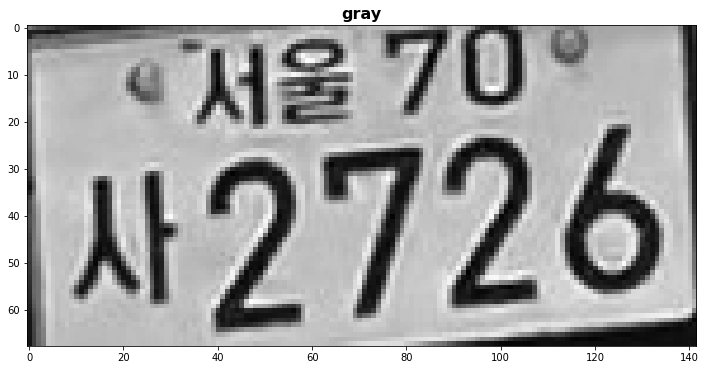

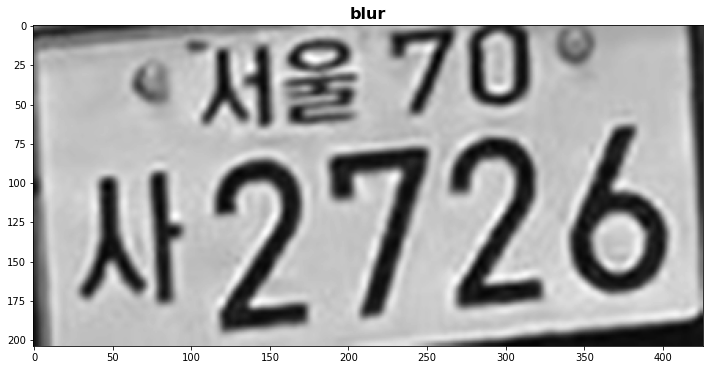

In [15]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract
import re
import math
import tensorflow as tf


# img = './Image/cut_img.JPEG'
# img = './Image/sample3.jpg'
# img = './yolov5/runs/hub/exp/crops/bus_num_fr/test_bus.jpg'
# img = './yolov5/runs/hub/exp/crops/license_plate/test_bus.jpg'
img = './yolov5/bus_test_fr.jpg'
img = './yolov5/test_bus4.jpg'
img = './yolov5/bus_272.jpg'
img = './yolov5/test_0527.jpg'
img = './yolov5/bus_1_pn.jpg'
# img = './yolov5/bus_2_pn.jpg'


def OCR(img):
    ## Original Image Load
    box = cv2.imread(img)
    
    ## 배경 Gray로 설정
    gray = cv2.cvtColor(box, cv2.COLOR_RGB2GRAY)
    plt.figure(figsize=(12, 10))
    plt.title('gray', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.imshow(gray,cmap='gray')

    ## 이미지 사이즈 정규화(확대)
    gray = cv2.resize(gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)

    ## 이미지 블러처리하기
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    plt.figure(figsize=(12, 10))
    plt.title('blur', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.imshow(blur,cmap='gray')
    
    # create blank string to hold license plate number
    plate_num = ""
        
    try:
        text = pytesseract.image_to_string(blur, config='digits --psm 7 --oem 1')
        # clean tesseract text by removing any unwanted blank spaces
        plate_num = re.sub('[\W_]+', '', text)
    except: 
        text = None
            
    if plate_num != None:
        return plate_num[-4:]
    else:
        return False
    
    
OCR(img)

# 버스 번호 OCR

'2227'

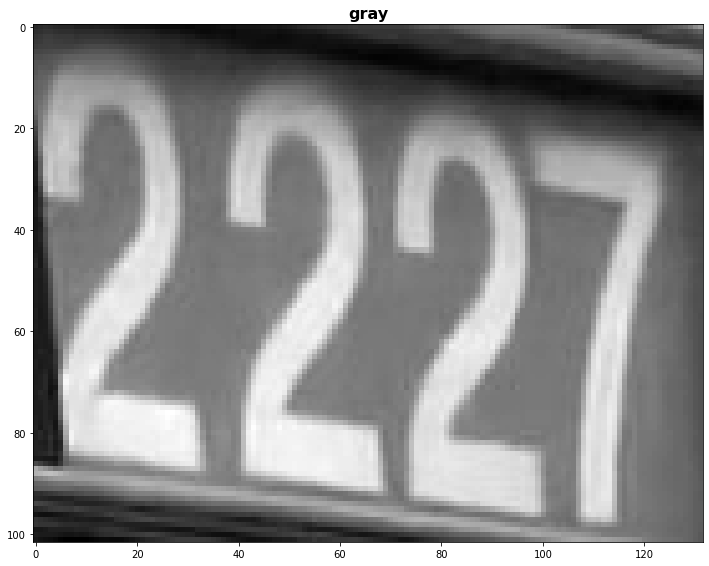

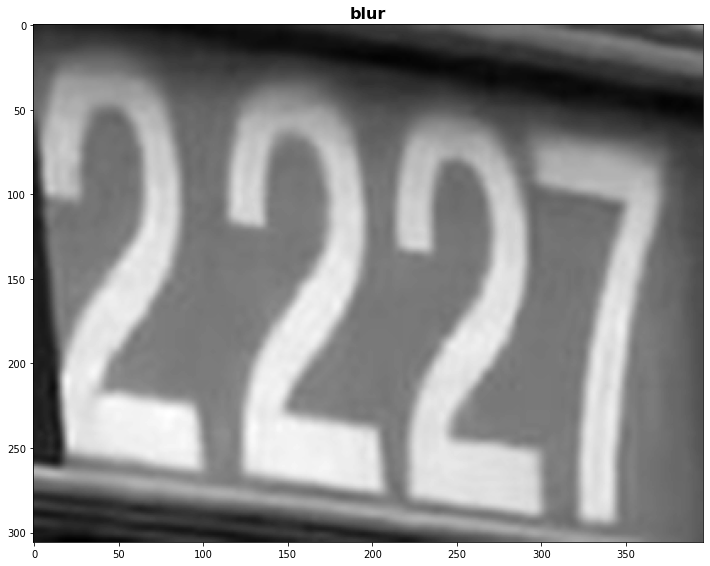

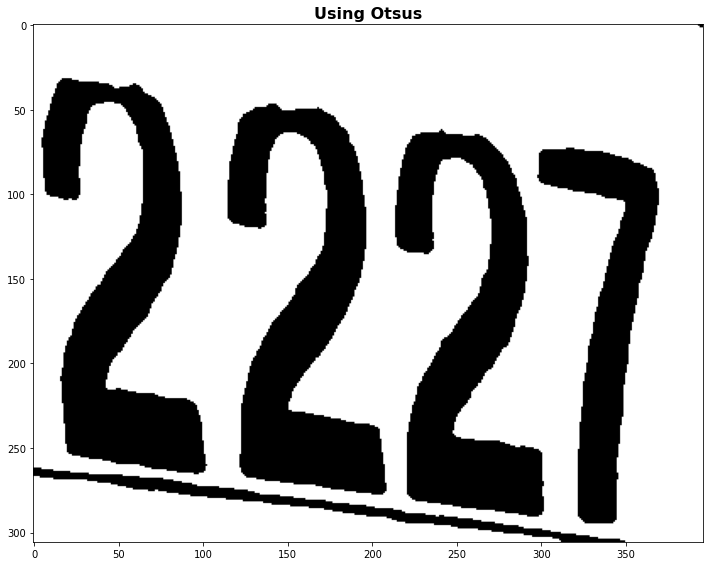

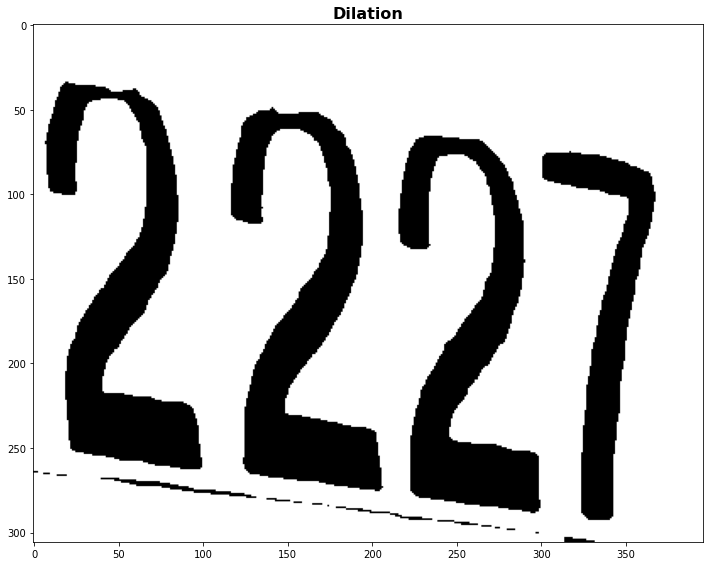

In [20]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract
import re
import math
import tensorflow as tf


# img = './Image/cut_img.JPEG'
# img = './Image/sample3.jpg'
img = './yolov5/runs/hub/exp/crops/bus_num_fr/test_bus.jpg'
# img = './yolov5/runs/hub/exp/crops/license_plate/test_bus/.jpg'
# img = './yolov5/bus_test_fr.jpg' # 디텍션 에바
# img = './yolov5/test_bus4.jpg' # 버스번호
# img = './yolov5/bus_272.jpg' # 버스번호
# img = './yolov5/test_0527.jpg' # 차량번호판
# img = './yolov5/bus_1_fr.jpg'
img = './yolov5/bus_2_fr.jpg'

def OCR(img):
    ## Original Image Load
    box = cv2.imread(img)
    
    ## 배경 Gray로 설정
    gray = cv2.cvtColor(box, cv2.COLOR_RGB2GRAY)
    plt.figure(figsize=(12, 10))
    plt.title('gray', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.imshow(gray,cmap='gray')

    ## 이미지 사이즈 정규화(확대)
    gray = cv2.resize(gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)

    ## 이미지 블러처리하기
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    plt.figure(figsize=(12, 10))
    plt.title('blur', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.imshow(blur,cmap='gray')
    
    ## 이미지 흑백 대조하기, 최적 임계값을 자동으로 추출하는 Otsus 사용
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    plt.figure(figsize=(12, 10))
    plt.title('Using Otsus', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.imshow(thresh,cmap='gray')
    
    ## 확장을 위한 커널 생성
    rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

    ## 글씨 이미지 크기 확장
    dilation = cv2.dilate(thresh, rect_kern, iterations = 1)
    plt.figure(figsize=(12, 10))
    plt.title('Dilation', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.imshow(dilation,cmap='gray')

    # create blank string to hold license plate number
    plate_num = ""
        
    try:
        text = pytesseract.image_to_string(dilation, config='--psm 7 --oem 1')
        # clean tesseract text by removing any unwanted blank spaces
        plate_num = re.sub('[\W_]+', '', text)
    except: 
        text = None
            
    if plate_num != None:
        return plate_num[-4:]
    else:
        return False
    
    
OCR(img)

# 버스 옆 번호

'2227'

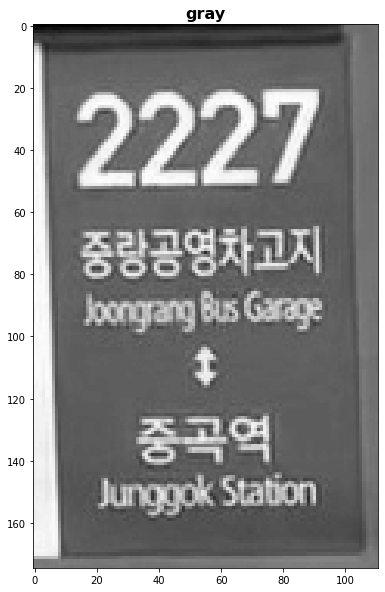

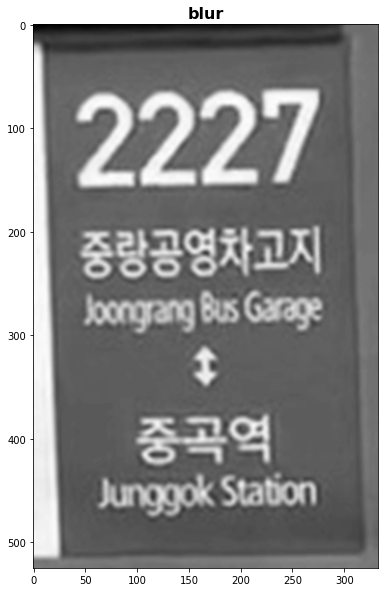

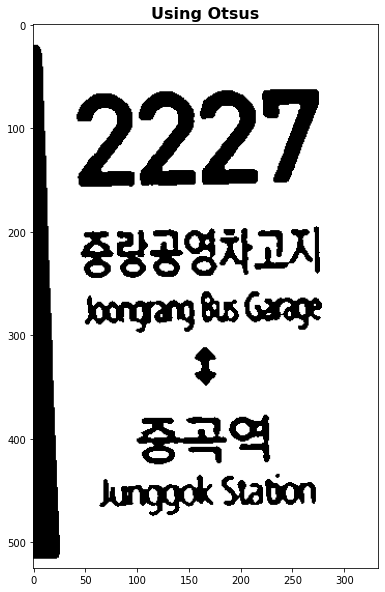

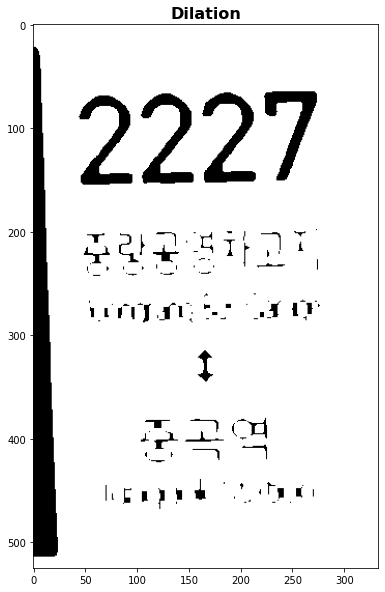

In [24]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract
import re
import math
import tensorflow as tf


# img = './Image/cut_img.JPEG'
# img = './Image/sample3.jpg'
img = './yolov5/runs/hub/exp/crops/bus_num_fr/test_bus.jpg'
# img = './yolov5/runs/hub/exp/crops/license_plate/test_bus/.jpg'
# img = './yolov5/bus_test_fr.jpg' # 디텍션 에바
# img = './yolov5/test_bus4.jpg' # 버스번호
# img = './yolov5/bus_272.jpg' # 버스번호
# img = './yolov5/test_0527.jpg' # 차량번호판
img = './yolov5/bus_1_fr.jpg'
img = './yolov5/bus_2_fr.jpg'
img = './yolov5/runs/hub/exp/crops/bus_num_side/bus_1_sd.jpg'
# img = './yolov5/runs/hub/exp/crops/bus_num_side/bus_2_sd.jpg'
# img = './yolov5/runs/hub/exp/crops/bus_num_side/bus_3_sd.jpg'
# img = './yolov5/runs/hub/exp/crops/bus_num_side/bus_4_sd.jpg'

def OCR(img):
    ## Original Image Load
    box = cv2.imread(img)
    
    ## 배경 Gray로 설정
    gray = cv2.cvtColor(box, cv2.COLOR_RGB2GRAY)
    plt.figure(figsize=(12, 10))
    plt.title('gray', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.imshow(gray,cmap='gray')

    ## 이미지 사이즈 정규화(확대)
    gray = cv2.resize(gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)

    ## 이미지 블러처리하기
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    plt.figure(figsize=(12, 10))
    plt.title('blur', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.imshow(blur,cmap='gray')
    
    ## 이미지 흑백 대조하기, 최적 임계값을 자동으로 추출하는 Otsus 사용
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    plt.figure(figsize=(12, 10))
    plt.title('Using Otsus', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.imshow(thresh,cmap='gray')
    
    ## 확장을 위한 커널 생성
    rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

    ## 글씨 이미지 크기 확장
    dilation = cv2.dilate(thresh, rect_kern, iterations = 1)
    plt.figure(figsize=(12, 10))
    plt.title('Dilation', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.imshow(dilation,cmap='gray')

    # create blank string to hold license plate number
    plate_num = ""
        
    try:
        text = pytesseract.image_to_string(gray, config='digits --psm 7 --oem 1')
        # clean tesseract text by removing any unwanted blank spaces
        plate_num = re.sub('[\W_]+', '', text)
    except: 
        text = None
            
    if plate_num != None:
        return plate_num[-4:]
    else:
        return False
    
    
OCR(img)